(4) 评估模型的性能并调参:                        
更详细的可以查看笔者的知乎：https://zhuanlan.zhihu.com/p/140040705

In [1]:
# 使用网格搜索进行超参数调优：
# 方式1：网格搜索GridSearchCV()
from sklearn.pipeline import make_pipeline   # 引入管道简化学习流程
from sklearn.preprocessing import StandardScaler # 由于SVR基于距离计算，引入对数据进行标准化的类
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("网格搜索经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

网格搜索经历时间：3.181 S
0.9800000000000001
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [6]:
# 方式2：随机网格搜索RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
# param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
gs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("随机网格搜索经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)


随机网格搜索经历时间：1.258 S
0.9788847117794484
{'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 10.0}


**当类别为两类时，可以绘制混淆矩阵与ROC曲线**

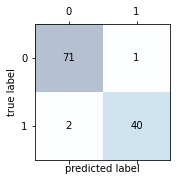

In [7]:
# 混淆矩阵：
# 加载数据
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None)
'''
乳腺癌数据集：569个恶性和良性肿瘤细胞的样本，M为恶性，B为良性
'''
# 做基本的数据预处理
from sklearn.preprocessing import LabelEncoder


X = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()    #将M-B等字符串编码成计算机能识别的0-1
y = le.fit_transform(y)
le.transform(['M','B'])
# 数据切分8：2
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [10]:
y[:5]

array([1, 1, 1, 1, 1])

<Figure size 432x288 with 0 Axes>

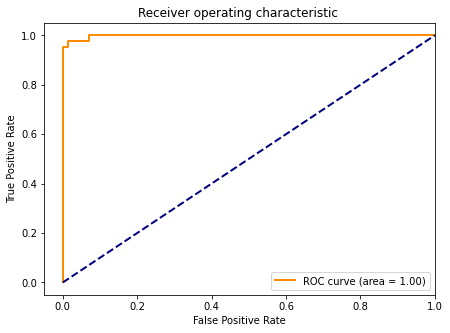

In [4]:
# 绘制ROC曲线：
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer,f1_score
scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
y_pred = gs.fit(X_train,y_train).decision_function(X_test)
#y_pred = gs.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###计算真阳率和假阳率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假阳率为横坐标，真阳率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()


# 3.结语

本章中，我们重点讨论了各种回归和分类算法的具体推导与简单应用，并且给出了如何使用sklearn这个强大的python工具库进行简单的机器学习模型的建模代码。本章的重点是各个基础算法的掌握，包括回归和分类(重点是分类)算法以及怎么用网格搜索以及其他搜索方式进行调参。简单模型在进行复杂项目的时候往往显得力不从心，那么在下一章中，我们将开始本次开源项目的主题----集成学习，我们着重讨论如何将本章所学的基础模型进行集成，变成功能更加强大的集成模型。

为了巩固本章的理解，在这里给个小任务，大家结合sklearn的fetch_lfw_people数据集，进行一次实战。fetch_lfw_people数据集是一个图像数据集，详细内容可以参照：                   
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html                   
案例的内容是对图像进行识别并分类。               
参考资料：                
https://blog.csdn.net/cwlseu/article/details/52356665                      
https://blog.csdn.net/jasonzhoujx/article/details/81905923

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# 1. 加载乳腺癌数据，并做数据认知
# 乳腺癌数据集，特征均为连续型，适合用SVM
breast_cancer = datasets.load_breast_cancer()
# print(breast_cancer.feature_names)
df = pd.concat([pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
                   ,pd.DataFrame(breast_cancer.target,columns=["label"])
                ]
               ,axis=1)
# print(df.head())
X=breast_cancer.data
y=breast_cancer.target
print(X.shape)
print(df['label'].value_counts())

(569, 30)
1    357
0    212
Name: label, dtype: int64


In [15]:
# 2. 使用SVM分类
# 使用网格搜索进行超参数调优：
# 方式1：网格搜索GridSearchCV()
from sklearn.pipeline import make_pipeline   # 引入管道简化学习流程
from sklearn.preprocessing import StandardScaler # 引入对数据进行标准化的类
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.001,0.01,0.05,0.1,0.5,1.0,5,10.0,50,100.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc
                  ,param_grid=param_grid
                  ,scoring='accuracy'
                  ,cv=10
                  ,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("SVM分类，网格搜索调参经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)


SVM分类，网格搜索调参经历时间：7.989 S
0.9788847117794486
{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [16]:
# 随机网格搜索
from sklearn.model_selection import RandomizedSearchCV
start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.001,0.01,0.05,0.1,0.5,1.0,5,10.0,50,100.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
# param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
gs = RandomizedSearchCV(estimator=pipe_svc
                        ,param_distributions=param_grid
                        ,scoring='accuracy'
                        ,cv=10
                        ,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("SVM分类，随机网格搜索调参经历时间：%.3f S" % float(end_time-start_time))
print(gs.best_score_)
print(gs.best_params_)

SVM分类，随机网格搜索调参经历时间：0.722 S
0.9771303258145363
{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 50}


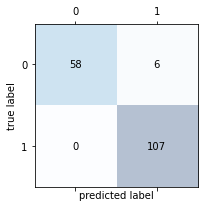

In [17]:
# 绘制混淆矩阵
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
# stratify=y，表示切分数据按照y中的比例分配
pipe_svc = make_pipeline(StandardScaler(),SVC(kernel="rbf"
                                              ,gamma=0.01
                                              ,C=1.0))
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax = plt.subplots(figsize=(3,3))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [10]:
X_mr=df_mr.iloc[:,2:]
y_mr=df_mr.iloc[:,1]
X_mr.shape
y_mr.shape

(8124,)

<Figure size 432x288 with 0 Axes>

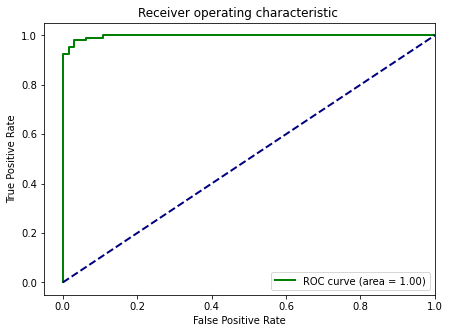

In [18]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer,f1_score
scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
y_pred = gs.fit(X_train,y_train).decision_function(X_test)
#y_pred = gs.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###计算真阳率和假阳率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假阳率为横坐标，真阳率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()


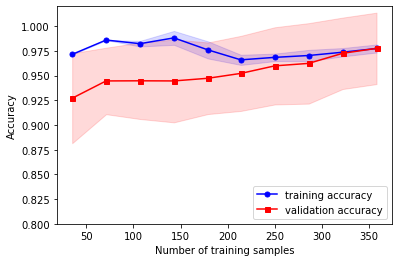

In [20]:
# 用学习曲线诊断偏差与方差
from sklearn.model_selection import learning_curve

pipe_svc = make_pipeline(StandardScaler(),SVC(kernel="rbf"
                                              ,gamma=0.01
                                              ,C=1.0))
train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_svc,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1,10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='red',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='red')
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8,1.02])
plt.show()

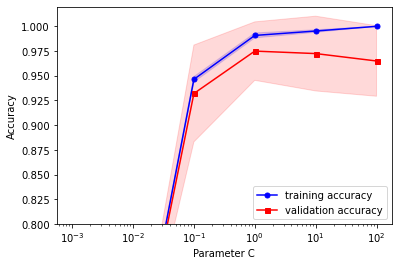

In [25]:
# 用验证曲线解决欠拟合和过拟合
from sklearn.model_selection import validation_curve

# pipe_lr3 = make_pipeline(StandardScaler(),LogisticRegression(random_state=1,penalty='l2'))
pipe_svc = make_pipeline(StandardScaler(),SVC())
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores = validation_curve(estimator=pipe_svc,X=X_train,y=y_train,param_name='svc__C',param_range=param_range,cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='red',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='red')
plt.xscale('log')
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim([0.8,1.02])
plt.show()